## Project Description

**InsaidTelecom, one of the leading telecom players, understands that customizing offering
is very important for its business to stay competitive.
Currently, InsaidTelecom is seeking to leverage behavioral data from more than 60% of the 50 million mobile devices active daily in India
to help its clients better understand and interact with their audiences.**

## Project Goal

**To understand
user's demographic characteristics based on their mobile usage, geolocation, and mobile device properties & by doing so help millions of developers and brand advertisers around the world pursue
data-driven marketing efforts.**

## Data Description

**The Data is collected from mobile apps that use Insaid Telecom services. Full recognition and consent from individual user of those apps have been obtained,
and appropriate anonymization have been performed to protect privacy. Due to confidentiality, we won't provide details on how the gender and age data was obtained.**

## Importing Libraries

In [184]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.float_format',lambda x: '%5f' % x)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

import folium

### Installing Mysql connector package

In [185]:
#!pip install mysql-connector-python

### Importing data from SQL server using mysql Connector.

In [186]:
'''import mysql.connector as connection

try:
    mydb = connection.connect(host="cpanel.insaid.co", database = 'Capstone1', user="student", passwd="student",
                              use_pure=True)
    query1 = "Select * from gender_age_train;"
    query2 = "Select * from phone_brand_device_model"
    gender_age_train = pd.read_sql(query1,mydb)
    phone_brand_device_model = pd.read_sql(query2,mydb)
    mydb.close() #close the connection
    
except Exception as e:
    mydb.close()
    print(str(e))'''

'import mysql.connector as connection\n\ntry:\n    mydb = connection.connect(host="cpanel.insaid.co", database = \'Capstone1\', user="student", passwd="student",\n                              use_pure=True)\n    query1 = "Select * from gender_age_train;"\n    query2 = "Select * from phone_brand_device_model"\n    gender_age_train = pd.read_sql(query1,mydb)\n    phone_brand_device_model = pd.read_sql(query2,mydb)\n    mydb.close() #close the connection\n    \nexcept Exception as e:\n    mydb.close()\n    print(str(e))'

### Saving the datasets into CSV Files

In [187]:
#gender_age_train.to_csv('gender_age_train.csv', index=False)

In [188]:
#phone_brand_device_model.to_csv('phone_brand_device_model.csv', index=False)

## Importing the datasets

In [189]:
df_users = pd.read_csv('gender_age_train.csv')
df_phone_brands = pd.read_csv('phone_brand_device_model.csv')
df_events = pd.read_csv('events_data.csv')


### Gender_age_train dataset

**This dataset consists Devices and their respective user details like gender, age and age_group**

In [190]:
df_users.head()

device_id gender  age   group
0 -8076087639492063270      M   35  M32-38
1 -2897161552818060146      M   35  M32-38
2 -8260683887967679142      M   35  M32-38
3 -4938849341048082022      M   30  M29-31
4   245133531816851882      M   30  M29-31

**- 74645 entries with int64 & object datatypes**

In [191]:
# Converting device ID column to Float value

df_users['device_id'] = df_users.device_id.astype(float)

In [192]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   device_id  74645 non-null  float64
 1   gender     74645 non-null  object 
 2   age        74645 non-null  int64  
 3   group      74645 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


In [193]:
df_users.describe(include='all')

device_id gender          age   group
count                 74645.000000  74645 74645.000000   74645
unique                         nan      2          nan      12
top                            nan      M          nan  M23-26
freq                           nan  47904          nan    9605
mean       -749135388419837.000000    NaN    31.410342     NaN
std     5327149733911456768.000000    NaN     9.868735     NaN
min    -9223067244542181376.000000    NaN     1.000000     NaN
25%    -4617366812584264704.000000    NaN    25.000000     NaN
50%      -18413620249632024.000000    NaN    29.000000     NaN
75%     4636655899093149696.000000    NaN    36.000000     NaN
max     9222849349208140800.000000    NaN    96.000000     NaN

**- The age column shows there are people below age of 10 and above age of 90 too.**

In [194]:
df_users.nunique()

device_id    74645
gender           2
age             85
group           12
dtype: int64

In [195]:
df_users.count()

device_id    74645
gender       74645
age          74645
group        74645
dtype: int64

In [196]:
df_users.isnull().sum()

device_id    0
gender       0
age          0
group        0
dtype: int64

**- No Null values in the dataset**

In [197]:
df_users.gender.value_counts()

M    47904
F    26741
Name: gender, dtype: int64

**- The percentage of Male users is far more than Female user.**

### Phone_brand_device_model Data

- Dataset consists of device ids with their brand and models.
- Few brands are in Chinese
- Brand Name 	Brand English Mapping
    - '华为'  --> 'Huawei'
    - '小米'  --> 'Xiaomi'
    - '三星'  --> 'Samsung'
    - 'vivo' --> 'vivo'
    - 'OPPO' --> 'OPPO'
    - '魅族'  --> 'Meizu'
    - '酷派'  --> 'Coolpad'
    - '乐视'  --> 'LeEco'
    - '联想 ' --> 'Lenovo'
    - 'HTC'  --> 'HTC**

In [198]:
df_phone_brands.head()

device_id phone_brand device_model
0  1877775838486905855        vivo          Y13
1 -3766087376657242966          小米         V183
2 -6238937574958215831        OPPO          R7s
3  8973197758510677470          三星        A368t
4 -2015528097870762664          小米      红米Note2

**- Phone Brand has most values in Chinese, which need to be mapped in English**

In [199]:
# COnverting Device ID to Float type

df_phone_brands.device_id = df_phone_brands.device_id.astype(float)

In [200]:
df_phone_brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   device_id     87726 non-null  float64
 1   phone_brand   87726 non-null  object 
 2   device_model  87726 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


**- dataset has device id as float64 datatype and other 2 as object datatype.**

In [201]:
df_phone_brands.count()

device_id       87726
phone_brand     87726
device_model    87726
dtype: int64

In [202]:
#Creating a dictionary to map chinese brand names to English 

brand_map = {'vivo': 'VIVO', '小米': 'Xiaomi', 'OPPO': 'OPPO', '三星': 'Samsung', '酷派': 'Coolpad',
             '联想 ': 'Lenovo', '华为': 'Huawei', '奇酷': 'Qiku', '魅族': 'Meizu', '斐讯': 'Phicomm',
             '中国移动': 'China Mobile', 'HTC': 'HTC', '天语':  'Tianyu', '至尊宝': 'Zhizunbao', 'LG': 'LG',
             '欧博信': 'Osoxin', '优米': 'Umidigi', 'ZUK': 'ZUK', '努比亚': 'Nubia',
             '惠普': 'HP', '尼比鲁': 'Nibiru', '美图': 'Meitu', '乡米': 'Xiangmi',
             '摩托罗拉': 'Motorola', '梦米': 'Mèng mǐ', '锤子': 'Hammer', '富可视': 'InFocus', '乐视': 'LeEco',
             '海信': 'Hisense', '百立丰': 'Bailifeng', '一加': 'OnePlus', '语信': 'Yǔ xìn',
             '海尔': 'Haier', '酷比': 'Coolby', '纽曼': 'Newmann', '波导': 'Waveguide', '朵唯': 'Duowei',
             '聆韵': 'Harmony', 'TCL': 'TCL', '酷珀': 'Cooper', '爱派尔': 'Aipel', 'LOGO': 'LOGO',
             '青葱': 'QCong', '果米': 'Guǒ mǐ', '华硕': 'ASUS', '昂达': 'Onda', '艾优尼': 'Ayuni',
             '康佳': 'Konka', '优购': 'Yougo', '邦华': 'Banghua', '赛博宇华': 'Sai Bo Yuhua',
             '黑米': 'Hēi mǐ', 'Lovme': 'Lovme', '先锋': 'Pioneer', 'E派': 'E Send',
             '神舟': 'Shenzhou', '诺基亚': 'Nokia', '普耐尔': 'Punel', '糖葫芦': 'Tanghulu', '亿通': 'Yitong',
             '欧新': 'Ou Xin', '米奇': 'MITCH', '酷比魔方': 'Rubiks Cube', '蓝魔': 'Lan Mo',
             '小杨树': 'Xiǎo yáng shù', '贝尔丰': 'Belfon', '糯米': 'Nuòmǐ', '米歌': 'Mi Ge',
             'E人E本': 'Eben', '西米': 'Simi', '大Q': 'Big Q', '台电': 'Taipower', '飞利浦': 'Philips',
             '唯米': 'Wei Mi', '大显': 'Daxian', '长虹': 'Changhong', '维图': 'Vitu', '青橙': 'Qing Cheng',
             '本为': 'Běn wèi', '虾米': 'Xiāmi', '夏新': 'Amoi', '帷幄': 'VIVO', '百加': 'Plus',
             'SUGAR': 'Sugar', '欧奇': 'Ouqi', '世纪星': 'Century Star', '智镁': 'Zhimei', '欧比': 'Europa',
             '基伍': 'Kiwish', '飞秒': 'Flying Second', '德赛': 'Desai', '易派': 'Yipai', '谷歌': 'Google',
             '金星数码': 'Venus Digital', '广信': 'Guang Xin', '诺亚信': 'Nuò yǎ xìn', 'MIL': 'MIL',
             '白米': 'Báimǐ', '大可乐': 'Dà kělè', '宝捷讯': 'Baojiexun', '优语': 'Youyu', '首云': 'Shǒu yún',
             '瑞米': 'Remy', '瑞高': 'Rigo', '沃普丰': 'Wopfon', '摩乐': 'Mole', '鲜米': 'Xiān mǐ',
             '凯利通': 'Kellyton', '唯比': 'Weibi', '欧沃': 'Ovo', '丰米': 'Fonmi', '恒宇丰': 'Hengyufeng',
             '奥克斯': 'Oaks', '西门子': 'Siemens', '欧乐迪': 'Oledi', 'PPTV': 'PPTV'}

In [203]:
#Maping the Chinese Brand names with English

df_phone_brands['phone_brand']=df_phone_brands.phone_brand.map(brand_map)


In [204]:
df_phone_brands.head()

device_id phone_brand device_model
0  1877775838486905856.000000        VIVO          Y13
1 -3766087376657243136.000000      Xiaomi         V183
2 -6238937574958216192.000000        OPPO          R7s
3  8973197758510676992.000000     Samsung        A368t
4 -2015528097870762752.000000      Xiaomi      红米Note2

In [205]:
df_phone_brands.isnull().sum()

device_id       0
phone_brand     0
device_model    0
dtype: int64

**- No Null Values.**

In [206]:
df_phone_brands['phone_brand'].unique()

array(['VIVO', 'Xiaomi', 'OPPO', 'Samsung', 'Coolpad', 'Lenovo', 'Huawei',
       'Qiku', 'Meizu', 'Phicomm', 'China Mobile', 'HTC', 'Tianyu',
       'Zhizunbao', 'LG', 'Osoxin', 'Umidigi', 'ZUK', 'Nubia', 'HP',
       'Nibiru', 'Meitu', 'Xiangmi', 'Motorola', 'Mèng mǐ', 'Hammer',
       'InFocus', 'LeEco', 'Hisense', 'Bailifeng', 'OnePlus', 'Yǔ xìn',
       'Haier', 'Coolby', 'Newmann', 'Waveguide', 'Duowei', 'Harmony',
       'TCL', 'Cooper', 'Aipel', 'LOGO', 'QCong', 'Guǒ mǐ', 'ASUS',
       'Onda', 'Ayuni', 'Konka', 'Yougo', 'Banghua', 'Sai Bo Yuhua',
       'Hēi mǐ', 'Lovme', 'Pioneer', 'E Send', 'Shenzhou', 'Nokia',
       'Punel', 'Tanghulu', 'Yitong', 'Ou Xin', 'MITCH', 'Rubiks Cube',
       'Lan Mo', 'Xiǎo yáng shù', 'Belfon', 'Nuòmǐ', 'Mi Ge', 'Eben',
       'Simi', 'Big Q', 'Taipower', 'Philips', 'Wei Mi', 'Daxian',
       'Changhong', 'Vitu', 'Qing Cheng', 'Běn wèi', 'Xiāmi', 'Amoi',
       'Plus', 'Sugar', 'Ouqi', 'Century Star', 'Zhimei', 'Europa',
       'Kiwish', 'Flyin

In [207]:
df_phone_brands['phone_brand'].value_counts().nlargest(10)

Xiaomi     21645
Samsung    19211
Huawei     15181
VIVO        7597
OPPO        6717
Meizu       5531
Coolpad     3979
HTC         1272
Lenovo       982
LeEco        841
Name: phone_brand, dtype: int64

**- Top 5 Phone brands are:-**
   - Xiaomi     
   - Samsung    
   - Huawei     
   - vivo        
   - OPPO        

In [208]:
x4 = df_phone_brands.device_model.unique()
print(x4)
type(x4)
x4.shape

['Y13' 'V183' 'R7s' ... 'Galaxy Tab S T705' 'IVO 8800' 'U59GT']


(1467,)

In [209]:
import re
x4a = []
for i in (x4):
    if re.search(u'[\u4e00-\u9fff]', str(i)):
        x4a.append(i)
        
print(x4a)

['红米Note2', '红米Note3', '大神F1Plus', 'note顶配版', '星星1号', '红米note', '青春版', '荣耀4A', '魅蓝Note 2', '荣耀7i', '荣耀畅玩4C', '红米2A', '荣耀畅玩5', '荣耀7', '红米1S', '麦芒4', '荣耀6', '荣耀畅玩4X', '荣耀3X畅玩版', '荣耀X2', '魅蓝NOTE', '荣耀6 Plus', '荣耀+', '荣耀畅玩4', '黄金斗士A8', '小米note', '荣耀3C', '小米4C', '红米note增强版', '天鉴W900', '荣耀畅玩5X', '红米2', '大神F1', '魅蓝2', 'Mate 7 青春版', '乐檬K3 Note', '火星一号', '乐檬K3', '联想黄金斗士S8', '大神F2', '魅蓝', '荣耀6 plus', '大神F2全高清版', '灵感XL', '旗舰版', '坚果手机', '红米', '超级手机1 Pro', '畅享5', '魅蓝metal', '超级手机1', '超级手机1s', '荣耀U8860', '纽扣', '荣耀畅玩平板T1', '红辣椒 X1', '春雷HD', 'ivvi 小i', '荣耀畅玩4C运动版', '麦芒3', '小鲜2', '大器2', '锋尚', '大神X7', '小苹果', '乐玩', '大神Note3', '么么哒3N', '锋尚Pro', '红辣椒', '荣耀3X', '三星big foot', '荣耀3C畅玩版', 'ivvi 小骨Pro', '红辣椒XM', '远航3', 'My 布拉格', 'metal 标准版', '畅享5S', '红辣椒Note', '锋尚Max', '2016版 Galaxy A9', '红牛V5', '2016版 Galaxy A5', '锋尚2', '金钢', '野火S', '2016版 Galaxy A7', '红米3', '小辣椒 X3', '荣耀平板T1-823L', '大神Note', '7295A青春版', '大Q Note', '么么哒', '小辣椒 M2', '黄金斗士Note8', '炫影S+', '风华3', 'TALK 7X四核', '2016版 Galaxy J7', '天鉴T1', '土星一号', '麦芒

In [210]:
x4adf = pd.DataFrame(x4a, columns=['zh'])
x4adf.reset_index(drop=True, inplace=True)
x4adf.head()

zh
0   红米Note2
1   红米Note3
2  大神F1Plus
3   note顶配版
4      星星1号

In [211]:
x4adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   zh      161 non-null    object
dtypes: object(1)
memory usage: 1.4+ KB


In [212]:
# # COMMENT OUT AFTER RUNNING TO PREVENT CROSSING USAGE LIMITS FOR THE API

# from google_trans_new import google_translator, LANGUAGES
# y4a=[]

# for i in x4a:
#     z4a = translator.translate(i)
#     y4a.append(z4a)

# model_eng_dict = dict(zip(x4a, y4a))

# print(model_eng_dict)

In [213]:
model_eng_dict = {'红米Note2': 'Redmi Note2 ', '红米Note3': 'Redmi Note3 ', 
                  '大神F1Plus': 'Daichi F1PLUS ', 'note顶配版': 'Note Pro ',
                  '星星1号': 'Star 1 ', '红米note': 'Redmi Note ',
                  '青春版': 'Youth Edition ', '荣耀4A': 'Honor 4A ',
                  '魅蓝Note 2': 'Charm blue note 2 ', '荣耀7i': 'Honor 7i ',
                  '荣耀畅玩4C': 'Honor play 4C ', '红米2A': 'Redmi 2a ', '荣耀畅玩5': 'Honor fun 5 ',
                  '荣耀7': 'Honor 7 ', '红米1S': 'Redmi 1s ', '麦芒4': 'Mai Mang 4 ',
                  '荣耀6': 'Honor6 ', '荣耀畅玩4X': 'Honor play 4X ', '荣耀3X畅玩版': 'Honor 3X play version ',
                  '荣耀X2': 'Honor X2 ', '魅蓝NOTE': 'Charm blue note ', '荣耀6 Plus': 'Honor 6 Plus ',
                  '荣耀+': 'Honor + ', '荣耀畅玩4': 'Honor play 4 ', '黄金斗士A8': 'Golden Fighter A8 ',
                  '小米note': 'Xiaomi Note ', '荣耀3C': 'Honor 3C ', '小米4C': 'Xiaomi 4C ',
                  '红米note增强版': 'Redmi Note Enhancement ', '天鉴W900': 'Tianjian W900 ',
                  '荣耀畅玩5X': 'Honor play 5X ', '红米2': 'Redmi 2 ', '大神F1': 'Daichi F1 ',
                  '魅蓝2': 'Charm blue 2 ', 'Mate 7 青春版': 'Mate 7 Youth Edition ', '乐檬K3 Note': 'Lemon K3 Note ',
                  '火星一号': 'Mars 1 ', '乐檬K3': 'Lemon K3 ', '联想黄金斗士S8': 'Lenovo Gold Fighter S8 ',
                  '大神F2': 'Daichi F2 ', '魅蓝': 'Charm blue ', '荣耀6 plus': 'Honor 6 Plus ',
                  '大神F2全高清版': 'Great God F2 Full HD Edition ', '灵感XL': 'Inspiration XL ',
                  '旗舰版': 'Ultimate ', '坚果手机': 'Nut mobile phone ', '红米': 'Redmi ',
                  '超级手机1 Pro': 'Superphone 1 Pro ', '畅享5': 'Enjoy 5 ', '魅蓝metal': 'Charm blue metal ',
                  '超级手机1': 'Superphone 1 ', '超级手机1s': 'Superphone 1S ', '荣耀U8860': 'Honor U8860 ',
                  '纽扣': 'Button ', '荣耀畅玩平板T1': 'Honor play tablet T1 ', '红辣椒 X1': 'Red pepper x1 ',
                  '春雷HD': 'Spring thunder HD ', 'ivvi 小i': 'IVVI Small I ', '荣耀畅玩4C运动版': 'Honor play 4C sports version ',
                  '麦芒3': 'Mai Mang 3 ', '小鲜2': 'Sediment 2 ', '大器2': 'Larger 2 ', '锋尚': 'Arrow ',
                  '大神X7': 'Great God x7 ', '小苹果': 'Small apple ', '乐玩': 'Fun ', '大神Note3': 'Daichi NOTE3 ',
                  '么么哒3N': 'What? 3N ', '锋尚Pro': 'Feng Shang PRO ', '红辣椒': 'Red chili ', '荣耀3X': 'Honor 3X ',
                  '三星big foot': 'Samsung Big Foot ', '荣耀3C畅玩版': 'Honor 3C fun version ',
                  'ivvi 小骨Pro': 'IVVI small bone Pro ', '红辣椒XM': 'Red pepper xm ', '远航3': 'Voyage 3 ',
                  'My 布拉格': 'My Prague ', 'metal 标准版': 'Metal Standard Edition ', '畅享5S': 'Enjoy 5S ',
                  '红辣椒Note': 'Red pepper Note ', '锋尚Max': 'Max ', '2016版 Galaxy A9': '2016 version of Galaxy A9 ',
                  '红牛V5': 'Red cattle V5 ', '2016版 Galaxy A5': '2016 version of Galaxy A5 ',
                  '锋尚2': 'Front ', '金钢': 'Jin Gang ', '野火S': 'Wildfire S ', '2016版 Galaxy A7': '2016 version of Galaxy A7 ',
                  '红米3': 'Redmi 3 ', '小辣椒 X3': 'Small pepper x3 ', '荣耀平板T1-823L': 'Honor Tablet T1-823L ',
                  '大神Note': 'Daijin Note ', '7295A青春版': '7295A Youth Edition ', '大Q Note': 'Big Q Note ',
                  '么么哒': 'muah ', '小辣椒 M2': 'Small pepper M2 ', '黄金斗士Note8': 'Gold Fighter Note8 ',
                  '炫影S+': 'Dazzling S + ', '风华3': 'Fenghua 3 ', 'TALK 7X四核': 'Talk 7X quad-core ',
                  '2016版 Galaxy J7': '2016 version of Galaxy J7 ', '天鉴T1': 'Tianjian T1 ', '土星一号': 'Saturn No. 1 ',
                  '麦芒3S': 'Mai Mang 3S ', '飞马': 'Fly horse ', '联想VIBE X2': 'Lenovo Vibe X2 ', '威武3': 'Mighty 3 ',
                  '红辣椒任性版 Plus': 'Red pepper edition PLUS ', '小辣椒 9': 'Small pepper 9 ', '大观4': 'Large view 4 ',
                  '超级手机Max': 'Superphone MAX ', '星星2号': 'Star 2 ', '雷霆战机': 'Thunder fighter ', '威武3C': 'Merry 3C ',
                  '倾城L3': 'Allure L3 ', 'Z9 mini 精英版': 'Z9 MINI Elite Edition ', '小辣椒S1': 'Small pepper s1 ',
                  '小辣椒 5': 'Small pepper 5 ', 'T03锋至版': 'T03 front to version ', '乐玩2C': "Let's play 2C ",
                  '么么哒3S': 'What? 3s ', '乐檬K31': 'Lemon K31 ', '黄金斗士S8畅玩版': 'Gold Fighter S8 Play Edition ',
                  '时尚手机': 'Fashion phone ', '大神1s': 'Daichi 1s ', '倾城L3C': 'Allure L3C ',
                  '小辣椒 4': 'Small pepper 4 ', 'Xperia Z1 炫彩版': 'Xperia Z1 colorful version ',
                  '微客': 'Micro ', '黄金斗士青春版': 'Gold Fighter Youth Edition ', '红辣椒NX Plus': 'Red pepper nx plus ',
                  '小鲜3': 'Fresh fresh 3 ', '小星星': 'little stars ', '大器3': 'Male 3 ', '小辣椒 6': 'Small pepper 6 ',
                  '金刚II': 'King Kong II ', '中兴远航3': 'ZTE Yuanhang 3 ', 'Axon天机': 'Axon Tiande ',
                  '青漾3': 'Qingne 3 ', '小辣椒 3': 'Small pepper 3 ', '旋影90w': 'Rocade 90W ',
                  '小辣椒 7': 'Small pepper 7 ', '醉享': 'Drunk ', '渴望HD': 'Desire HD ', '小辣椒 M3': 'Small pepper M3 ',
                  '飞马3': 'Fly hum ', '领世旗舰3': 'Liracial flagship 3 ', '小辣椒X4': 'Small pepper x4 ',
                  '红辣椒Note3': 'Red hot chili Note3 ', '天鉴W808': 'Tianjian W808 ', '天鉴W900S': 'Tianjian W900S ',
                  '大观铂顿': 'Grand Platinum ', '魅蓝Note3': 'Charm blue note3 ', 'Razr V锋芒': 'Razr V ',
                  '火星一号探索版': 'Mars 1 exploration version ', 'Moto X极': 'Moto X ', '魔镜 X5': 'Mirror X5 ',
                  '小章鱼': 'Small octopus ', '乐檬3': 'Lemon 3 ', '乐檬X3': 'Lemon X3 ', '飞马2 Plus': 'Feima 2 Plus '}

In [214]:
df_phone_brands['device_model'] = df_phone_brands['device_model'].map(model_eng_dict).fillna(df_phone_brands['device_model'])

In [215]:
df_phone_brands.head()

device_id phone_brand  device_model
0  1877775838486905856.000000        VIVO           Y13
1 -3766087376657243136.000000      Xiaomi          V183
2 -6238937574958216192.000000        OPPO           R7s
3  8973197758510676992.000000     Samsung         A368t
4 -2015528097870762752.000000      Xiaomi  Redmi Note2

In [216]:
df_phone_brands.isnull().sum()

device_id       0
phone_brand     0
device_model    0
dtype: int64

### Events Dataset

In [217]:
df_events.head()

event_id                   device_id            timestamp  longitude  \
0   2765368  2973347786994914304.000000  2016-05-07 22:52:05  77.225676   
1   2955066  4734221357723754496.000000  2016-05-01 20:44:16  88.388361   
2    605968 -3264499652692492800.000000  2016-05-02 14:23:04  77.256809   
3    448114  5731369272434022400.000000  2016-05-03 13:21:16  80.343613   
4    665740   338888002570799936.000000  2016-05-06 03:51:05  85.997745   

   latitude      city       state  
0 28.730140     Delhi       Delhi  
1 22.660325  Calcutta  WestBengal  
2 28.757906     Delhi       Delhi  
3 13.153332   Chennai   TamilNadu  
4 23.842609    Bokaro   Jharkhand

In [218]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [219]:
df_events.describe(include='all')

event_id                   device_id            timestamp  \
count  3252950.000000              3252497.000000              3252950   
unique            nan                         nan               588126   
top               nan                         nan  2016-05-03 10:00:03   
freq              nan                         nan                   43   
mean   1626475.500000   101220009585509024.000000                  NaN   
std     939045.923418  5316758188197051392.000000                  NaN   
min          1.000000 -9222956879900150784.000000                  NaN   
25%     813238.250000 -4540611333857475072.000000                  NaN   
50%    1626475.500000   172682011159278816.000000                  NaN   
75%    2439712.750000  4861813234983622656.000000                  NaN   
max    3252950.000000  9222849349208140800.000000                  NaN   

            longitude       latitude     city    state  
count  3252527.000000 3252527.000000  3252950  3252573  
unique            nan            nan      933       32  
top               nan            nan    Delhi    Delhi  
freq              nan            nan   744276   751733  
mean        78.158677      21.688514      NaN      NaN  
std          4.235570       5.789111      NaN      NaN  
min         12.567000       8.190110      NaN      NaN  
25%         75.835430      17.801705      NaN      NaN  
50%         77.268142      22.164537      NaN      NaN  
75%         80.319160      28.682778      NaN      NaN  
max         95.459457      41.871900      NaN      NaN

In [220]:
df_events.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

**- Null Values present in the dataset which need to be looked into.**
- Device ID has 453 null values
- Longitude & latitude has 423 null values each
- State has 377 null values

In [221]:
df_events.state.nunique()

32

In [222]:
print(df_events[pd.isnull(df_events['state'])].isnull().sum())
print()
print(df_events[pd.isnull(df_events['device_id'])].isnull().sum())
print()
print(df_events[pd.isnull(df_events['longitude'])].isnull().sum())

event_id       0
device_id      0
timestamp      0
longitude      0
latitude       0
city           0
state        377
dtype: int64

event_id       0
device_id    453
timestamp      0
longitude      0
latitude       0
city           0
state          0
dtype: int64

event_id       0
device_id      0
timestamp      0
longitude    423
latitude     423
city           0
state          0
dtype: int64


- **Where device_id has a null value, the rest columns in that row has non-null values.**
- **Similarly where Longitude and latitude has null value, rest columns in that row has non-null values.**
- **The same is noticed with state null values.**

#### Filling Missing values for State

In [223]:
# getting a list of city values corresponfing to State Null values.

state_null_city_list=df_events[df_events.state.isnull()].city.unique()
print(state_null_city_list)
type(state_null_city_list)

['Pune' 'Visakhapatnam' 'Indore' 'Chennai' 'Delhi' 'Channapatna' 'Jaipur'
 'Gangarampur' 'Arambagh']


numpy.ndarray

In [224]:
#Finding corresponding values of states from events data for filling null values in state columns

state_null_value = []
for i in state_null_city_list:
    x = df_events['state'].where((df_events['city']== i)).dropna().unique()#.tolist()
    state_null_value.append(x)

state_null_value= list(np.concatenate(state_null_value).flat)
state_null_value
    

['Maharashtra',
 'AndhraPradesh',
 'MadhyaPradesh',
 'TamilNadu',
 'Delhi',
 'Karnataka',
 'Rajasthan',
 'WestBengal',
 'WestBengal']

In [225]:
# Converting both lists to dictionary
missing_states = dict(zip(state_null_city_list, state_null_value))

In [226]:
missing_states

{'Pune': 'Maharashtra',
 'Visakhapatnam': 'AndhraPradesh',
 'Indore': 'MadhyaPradesh',
 'Chennai': 'TamilNadu',
 'Delhi': 'Delhi',
 'Channapatna': 'Karnataka',
 'Jaipur': 'Rajasthan',
 'Gangarampur': 'WestBengal',
 'Arambagh': 'WestBengal'}

In [227]:
# Filling Missing Values for state column in events dataset

df_events.state = df_events.state.fillna(df_events.city.map(missing_states))

In [228]:
df_events.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state          0
dtype: int64

#### Filling missing values for Device_ID

In [229]:
device_id_null_long = df_events[df_events.device_id.isnull()].longitude.unique()
device_id_null_lat = df_events[df_events.device_id.isnull()].latitude.unique()
print(device_id_null_long)
print(device_id_null_lat)

[75.882956 75.888487 75.846007 75.923332 75.992551 73.862756 73.860165
 83.357991 77.292481 73.926499 80.343613 80.309272 77.274814 83.371738
 75.95805  83.342711 75.836167 80.335435 73.169345 70.686387 77.303153]
[22.814519 26.948689 26.960796 22.777781 31.561747 18.628057 18.566925
 17.805195 28.719966 18.614812 13.153332 13.149176 28.721053 17.752819
 22.817526 17.822906 26.95399  13.189053 21.194283 21.790693 28.728888]


In [230]:
#Finding corresponding values of device_id's from events data for filling null values in device_id column

device_id_null_value = []
for i in range(0,len(device_id_null_long)):
    x = (df_events['longitude']== device_id_null_long[i] ) & (df_events['latitude'] == device_id_null_lat[i])
    y = df_events[x]
    device_id_null_value.append(y.device_id.dropna().unique())

device_id_null_value =list(np.concatenate(device_id_null_value).flat)
device_id_null_value

[3.1328613559497626e+18,
 -9.177251100412943e+17,
 -8.460337302442786e+18,
 7.597735768595925e+18,
 1.750778632182067e+18,
 9.027085705222633e+18,
 8.539870903150472e+18,
 6.844192269280791e+18,
 5.098778421671838e+18,
 1.771585711650787e+17,
 5.731369272434022e+18,
 7.66213914371992e+18,
 3.724654925765159e+18,
 -3.1309031770761733e+18,
 -2.399250255599833e+18,
 6.619714762103552e+18,
 3.562355872640618e+18,
 7.983871429718485e+18,
 -8.215770519233686e+18,
 -1.688015122502424e+18,
 -6.875585507485886e+18]

In [231]:
# Checking if unique Longitude has unique latitude values.

df_events[df_events.device_id.isnull()].groupby('longitude')['latitude'].unique()

longitude
70.686387             [21.790693]
73.169345             [21.194283]
73.860165             [18.566925]
73.862756             [18.628057]
73.926499             [18.614812]
75.836167              [26.95399]
75.846007             [26.960796]
75.882956             [22.814519]
75.888487             [26.948689]
75.923332             [22.777781]
75.958050             [22.817526]
75.992551    [31.561746999999997]
77.274814             [28.721053]
77.292481    [28.719966000000003]
77.303153             [28.728888]
80.309272             [13.149176]
80.335435             [13.189053]
80.343613             [13.153332]
83.342711             [17.822906]
83.357991             [17.805195]
83.371738             [17.752819]
Name: latitude, dtype: object

- **Each unique Longitude has a unique Latitude value for missing values in device id.**
- **Hence we can map the device id using Longitude or latitude.**

In [232]:
# Converting lists into dictionary

missing_device_id = dict(zip(device_id_null_long, device_id_null_value))

missing_device_id

{75.88295600000002: 3.1328613559497626e+18,
 75.888487: -9.177251100412943e+17,
 75.846007: -8.460337302442786e+18,
 75.92333199999999: 7.597735768595925e+18,
 75.99255099999998: 1.750778632182067e+18,
 73.862756: 9.027085705222633e+18,
 73.86016500000002: 8.539870903150472e+18,
 83.357991: 6.844192269280791e+18,
 77.29248100000002: 5.098778421671838e+18,
 73.92649899999998: 1.771585711650787e+17,
 80.34361299999998: 5.731369272434022e+18,
 80.30927199999998: 7.66213914371992e+18,
 77.27481399999998: 3.724654925765159e+18,
 83.371738: -3.1309031770761733e+18,
 75.95805: -2.399250255599833e+18,
 83.342711: 6.619714762103552e+18,
 75.836167: 3.562355872640618e+18,
 80.33543499999998: 7.983871429718485e+18,
 73.16934499999998: -8.215770519233686e+18,
 70.686387: -1.688015122502424e+18,
 77.30315300000002: -6.875585507485886e+18}

In [233]:
# Filling the missing values in device_id column

df_events.device_id = df_events.device_id.fillna(df_events.longitude.map(missing_device_id))

In [234]:
df_events.isnull().sum()

event_id       0
device_id      0
timestamp      0
longitude    423
latitude     423
city           0
state          0
dtype: int64

In [235]:
df_events[df_events['event_id'] == 1936567]

event_id                  device_id            timestamp  longitude  \
2055   1936567 3132861355949762560.000000  2016-05-02 15:27:54  75.882956   

      latitude    city          state  
2055 22.814519  Indore  MadhyaPradesh

#### Filling Missing Values for Longitude & Latitude Column

In [236]:
long_lat_null = df_events[pd.isnull(df_events['longitude'])].device_id.unique()
print(long_lat_null)
len(long_lat_null)

[ 1.77963102e+18 -8.79056003e+18  4.86560657e+18  7.98387143e+18
 -7.36484063e+18  5.37559902e+18  5.51865960e+18  4.58017944e+18
 -6.03379839e+18  7.66213914e+18  2.35097940e+18  4.37503983e+18
  4.78258205e+18  1.32005098e+18  5.73136927e+18  3.73828049e+18
  3.05848775e+17  7.01860038e+18  5.11518528e+18  6.77407134e+18
  3.09916855e+18]


21

In [237]:
long_lat_missing_list =[]
for i in range(0,len(long_lat_null)):
    a = df_events[['longitude','latitude']].where(df_events.device_id == long_lat_null[i]).dropna()     
    b = a.drop_duplicates().values.tolist()
    long_lat_missing_list.append(b)
long_lat_null_list = [item for elem in long_lat_missing_list for item in elem]
print(long_lat_null_list)
len(long_lat_null_list)

[[77.235416, 28.738901], [75.933778, 22.761965], [83.35144199999998, 17.772251999999995], [80.33543499999998, 13.189053], [73.931944, 18.54074], [77.283447, 28.718391999999998], [83.384242, 17.817945], [75.835756, 26.960220000000003], [83.31978699999998, 17.816579], [80.30927199999998, 13.149176], [75.888474, 22.745063000000002], [75.824489, 26.980345000000003], [77.22522, 28.718379], [87.570736, 26.211919], [80.34361299999998, 13.153332], [75.937988, 22.76201], [75.865534, 26.987565999999998], [73.92622300000002, 18.575747], [73.88868000000002, 18.556741], [75.268748, 30.904178], [84.1409, 27.17739700000001]]


21

In [238]:
long_list, lat_list = map(list,zip(*long_lat_null_list))

In [239]:
print(long_list,'\n',lat_list)

[77.235416, 75.933778, 83.35144199999998, 80.33543499999998, 73.931944, 77.283447, 83.384242, 75.835756, 83.31978699999998, 80.30927199999998, 75.888474, 75.824489, 77.22522, 87.570736, 80.34361299999998, 75.937988, 75.865534, 73.92622300000002, 73.88868000000002, 75.268748, 84.1409] 
 [28.738901, 22.761965, 17.772251999999995, 13.189053, 18.54074, 28.718391999999998, 17.817945, 26.960220000000003, 17.816579, 13.149176, 22.745063000000002, 26.980345000000003, 28.718379, 26.211919, 13.153332, 22.76201, 26.987565999999998, 18.575747, 18.556741, 30.904178, 27.17739700000001]


In [240]:
long_dict = dict(zip(long_lat_null,long_list))
lat_dict = dict(zip(long_lat_null,lat_list))

In [241]:
df_events['longitude'] = df_events['longitude'].fillna(df_events.device_id.map(long_dict))
df_events['latitude'] = df_events['latitude'].fillna(df_events.device_id.map(lat_dict))

df_events[df_events['event_id']==2929521 ]

event_id                  device_id            timestamp  longitude  \
8015   2929521 1779631023439405312.000000  2016-05-05 01:15:22  77.235416   

      latitude   city  state  
8015 28.738901  Delhi  Delhi

In [242]:
df_events.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

### Merging the datasets

#### Merging all 3 datasets

- We have device id as common column in all three dataframe.
- so we do inner join on above dataframes as we do not want any null values.

In [243]:
# merging Phone brand data to user data on Device ID column
df1 = pd.merge(df_phone_brands,df_users, on='device_id', how='inner')

In [244]:
df1.head()

device_id phone_brand    device_model gender  age   group
0 -4938849341048082432.000000     Samsung       Galaxy S4      M   30  M29-31
1   245133531816851872.000000       Sugar  Fashion phone       M   30  M29-31
2 -8098239495777311744.000000      Xiaomi           MI 2S      M   38  M32-38
3   176515041953473536.000000      Huawei           G610S      M   33  M32-38
4  6352067998666467328.000000     Samsung       Galaxy S3      M   32  M32-38

In [245]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74617 entries, 0 to 74616
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   device_id     74617 non-null  float64
 1   phone_brand   74617 non-null  object 
 2   device_model  74617 non-null  object 
 3   gender        74617 non-null  object 
 4   age           74617 non-null  int64  
 5   group         74617 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.0+ MB


In [247]:
df_final = pd.merge(df_events, df1, on='device_id', how='inner')

In [248]:
df_final.head()

event_id                  device_id            timestamp  longitude  \
0   2765368 2973347786994914304.000000  2016-05-07 22:52:05  77.225676   
1   1355198 2973347786994914304.000000  2016-05-01 01:35:45  77.225676   
2   1630972 2973347786994914304.000000  2016-05-03 00:07:34  77.225676   
3   2732453 2973347786994914304.000000  2016-05-01 06:15:59  77.225676   
4   1562542 2973347786994914304.000000  2016-05-01 20:34:19  77.225676   

   latitude   city  state phone_brand device_model gender  age   group  
0 28.730140  Delhi  Delhi     Umidigi        UIMI3      M   35  M32-38  
1 28.730140  Delhi  Delhi     Umidigi        UIMI3      M   35  M32-38  
2 28.730140  Delhi  Delhi     Umidigi        UIMI3      M   35  M32-38  
3 28.730140  Delhi  Delhi     Umidigi        UIMI3      M   35  M32-38  
4 28.730140  Delhi  Delhi     Umidigi        UIMI3      M   35  M32-38

In [249]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252950 entries, 0 to 3252949
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   event_id      int64  
 1   device_id     float64
 2   timestamp     object 
 3   longitude     float64
 4   latitude      float64
 5   city          object 
 6   state         object 
 7   phone_brand   object 
 8   device_model  object 
 9   gender        object 
 10  age           int64  
 11  group         object 
dtypes: float64(3), int64(2), object(7)
memory usage: 322.6+ MB


In [250]:
df_final.isnull().sum()

event_id        0
device_id       0
timestamp       0
longitude       0
latitude        0
city            0
state           0
phone_brand     0
device_model    0
gender          0
age             0
group           0
dtype: int64

In [251]:
df_final.nunique()

event_id        3252950
device_id         60865
timestamp        588126
longitude         60095
latitude          60185
city                933
state                32
phone_brand         105
device_model       1385
gender                2
age                  85
group                12
dtype: int64

#### Filtering on Delhi State

- We have to focus only on Delhi data. Hence we filter our final Merged Dataframe to delhi state.

In [253]:
df_final_delhi = df_final.query("state =='Delhi'")
df_final_delhi.head()

event_id                  device_id            timestamp  longitude  \
0   2765368 2973347786994914304.000000  2016-05-07 22:52:05  77.225676   
1   1355198 2973347786994914304.000000  2016-05-01 01:35:45  77.225676   
2   1630972 2973347786994914304.000000  2016-05-03 00:07:34  77.225676   
3   2732453 2973347786994914304.000000  2016-05-01 06:15:59  77.225676   
4   1562542 2973347786994914304.000000  2016-05-01 20:34:19  77.225676   

   latitude   city  state phone_brand device_model gender  age   group  
0 28.730140  Delhi  Delhi     Umidigi        UIMI3      M   35  M32-38  
1 28.730140  Delhi  Delhi     Umidigi        UIMI3      M   35  M32-38  
2 28.730140  Delhi  Delhi     Umidigi        UIMI3      M   35  M32-38  
3 28.730140  Delhi  Delhi     Umidigi        UIMI3      M   35  M32-38  
4 28.730140  Delhi  Delhi     Umidigi        UIMI3      M   35  M32-38

In [254]:
df_final_delhi.shape

(751797, 12)

In [256]:
df_final_delhi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751797 entries, 0 to 3252825
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   event_id      751797 non-null  int64  
 1   device_id     751797 non-null  float64
 2   timestamp     751797 non-null  object 
 3   longitude     751797 non-null  float64
 4   latitude      751797 non-null  float64
 5   city          751797 non-null  object 
 6   state         751797 non-null  object 
 7   phone_brand   751797 non-null  object 
 8   device_model  751797 non-null  object 
 9   gender        751797 non-null  object 
 10  age           751797 non-null  int64  
 11  group         751797 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 74.6+ MB


- **The Final filter on Delhi state gives 751797 rows which is same as the delhi state filtered dataframe.**
- **All the events data for delhi state is retained in the final dataframe.**

In [257]:
df_final_delhi.nunique()

event_id        751797
device_id         4909
timestamp       412099
longitude         4795
latitude          4791
city                10
state                1
phone_brand         61
device_model       631
gender               2
age                 69
group               12
dtype: int64

## DATA Visualization on Delhi Data

In [260]:
df_final_delhi['timestamp'] = pd.to_datetime(df_final_delhi['timestamp'])

In [265]:
print(df_final_delhi['timestamp'].dt.date.min())
print(df_final_delhi['timestamp'].dt.date.max())

2016-04-30
2016-05-08


- **Date range of user events recorded for delhi is from 30th April,2016 to 8th May,2016.**
- **Dataset contains 7 days of data from 1st of May 2016 to 7th of May 2016 (few data points were recorded few minuted before midnight of 1st May2016 and few are after midnight of 7th May 2016.**

In [267]:
# Creating a day of week column and hour of the day column
df_final_delhi['days'] = df_final_delhi.timestamp.dt.day_name()
df_final_delhi['hour']= df_final_delhi.timestamp.dt.hour

In [258]:
# New Dataframe with unique device IDs.
df_unique_did = df_final_delhi.drop_duplicates(subset='device_id', keep='first')
df_unique_did.shape


(4909, 12)

In [285]:
sns.set(style='whitegrid', palette='viridis', color_codes=True)
sns.mpl.rc('figure', figsize=(15,8))

### Profiling on Final Delhi Data

In [278]:
profile_pl = df_final_delhi.profile_report(title="Capstone project_1008 insaid pre_profiling", progress_bar=False, minimal=True) 
profile_pl.to_file(output_file="capstone_1008_pre_profiling.html")

- **Observations from Profiling**

- Dataset statistics
    - Number of variables	15
    - Number of observations	751797
    - Missing cells	0
    - Missing cells (%)	0.0%
    - Duplicate rows	0
    - Duplicate rows (%)	0.0%
    
    
- Variable types
    - Numeric	7
    - DateTime	1
    - Categorical	7
    
- Device_id has 4909 unique values
- Dataset contains 7 days of data from 1st of May 2016 to 7th of May 2016 (few data points were recorded few minuted before midnight of 1st May2016 and few are after midnight of 7th May 2016).
- Longitude has 4795 unique Values & Latitude has 7491 unique values.
- 99% of events are recorded in delhi city.
- Huawei, Xaiomi & Samsung has more than 60% frequency of events recorded.
- Frequency of users between age 25 to 35 is highest, with peak at 29.
- Age group has highest frequency for 29 abov for both Males & Females.

### Distribution of device ID.

#### Across State.

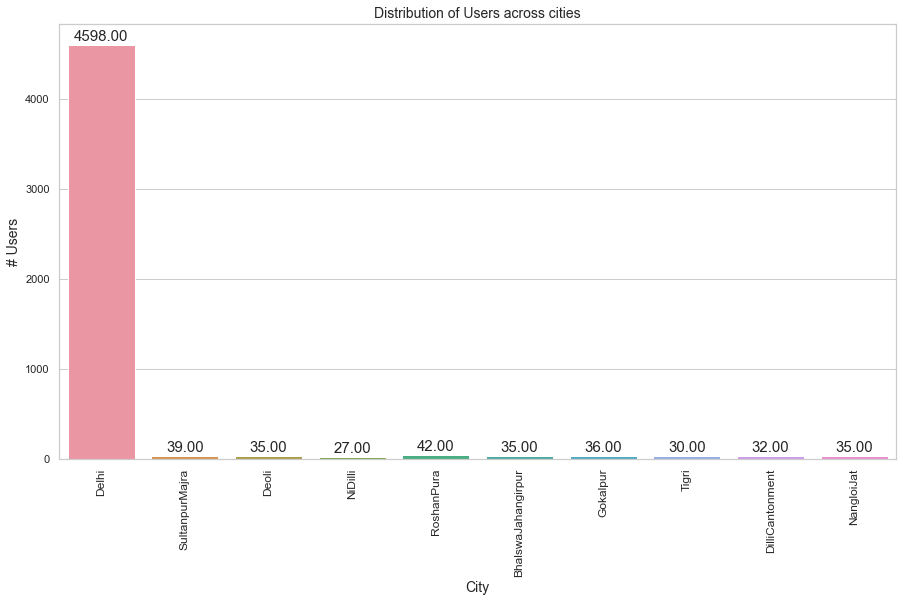

In [289]:
plots = sns.countplot(x='city',data=df_unique_did);
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=90, fontsize=12);
plt.xlabel('City',fontsize=14)
plt.ylabel('# Users', fontsize= 14);
plt.title("Distribution of Users across cities", fontsize=14);

- **More than 90% of the user are from central Delhi area.**

#### Across Phone_Brands(Top 10)

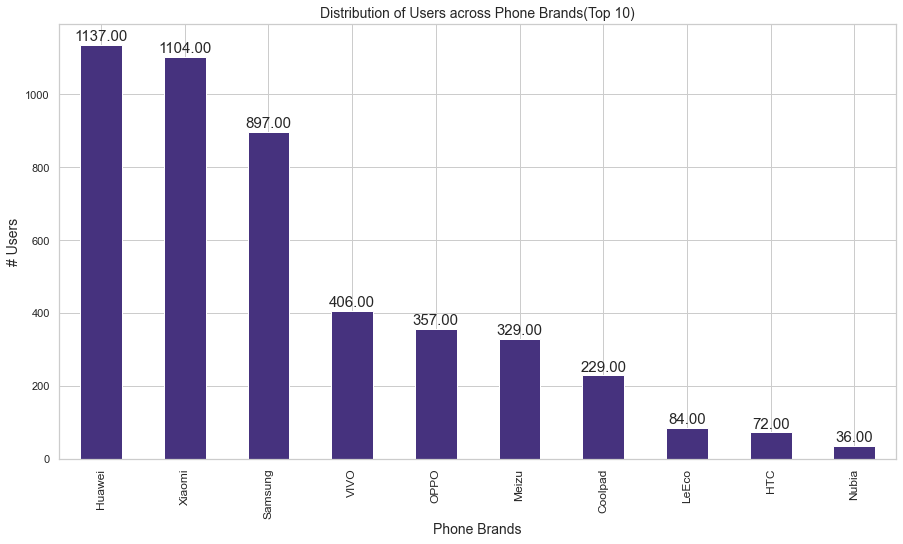

In [294]:
plots = df_unique_did.groupby('phone_brand')['device_id'].count().nlargest(10).plot(kind='bar');
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=90, fontsize=12);
plt.xlabel('Phone Brands',fontsize=14)
plt.ylabel('# Users', fontsize= 14);
plt.title("Distribution of Users across Phone Brands(Top 10)", fontsize=14);

- Huawei is the most used phone brand among these users in Delhi, followed by Xiaomi & Samsung.
- Nubia is a new brand to enter into top 10 in delhi.

#### Across Phone Models(top 10 Most used)

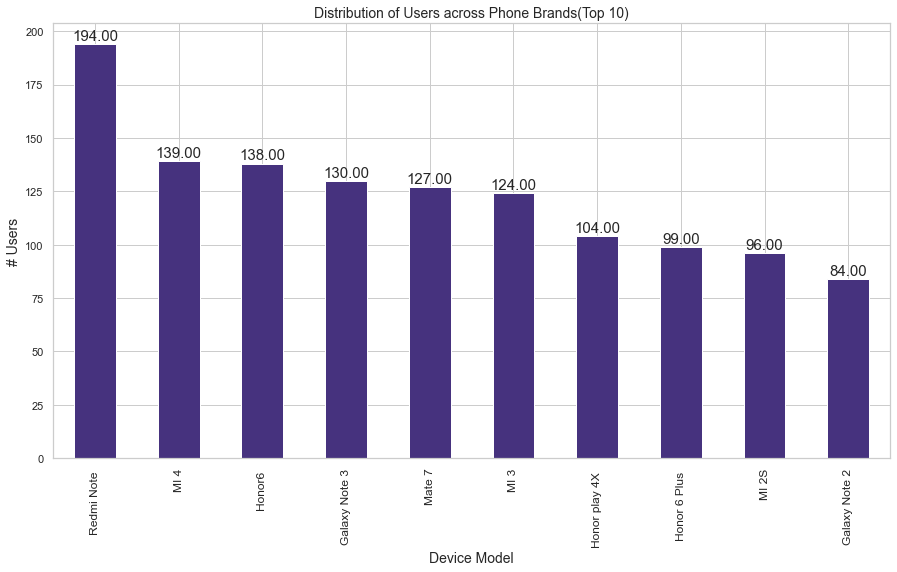

In [296]:
plots = df_unique_did.groupby('device_model')['device_id'].count().nlargest(10).plot(kind='bar');
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=90, fontsize=12);
plt.xlabel('Device Model',fontsize=14)
plt.ylabel('# Users', fontsize= 14);
plt.title("Distribution of Users across Phone Brands(Top 10)", fontsize=14);

- Redmi Note has most users.

#### Across Gender

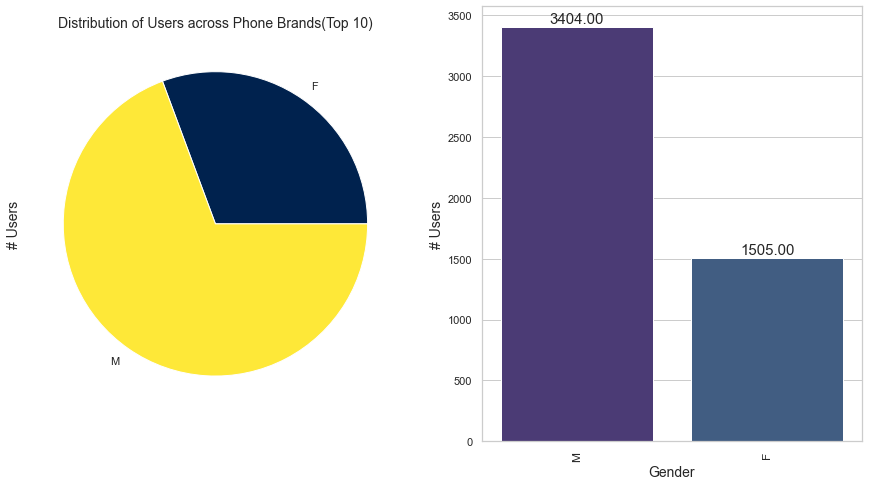

In [304]:
plt.subplot(1,2,1)
df_unique_did.groupby('gender')['device_id'].count().plot(kind='pie', cmap='cividis');
plt.ylabel('# Users', fontsize= 14);
plt.title("Distribution of Users across Phone Brands(Top 10)", fontsize=14);

plt.subplot(1,2,2)
plots = sns.countplot(x='gender', data=df_unique_did)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=90, fontsize=12);
plt.xlabel('Gender',fontsize=14)
plt.ylabel('# Users', fontsize= 14);

- There is a clear dominance in the number of Male users.

#### Across Age

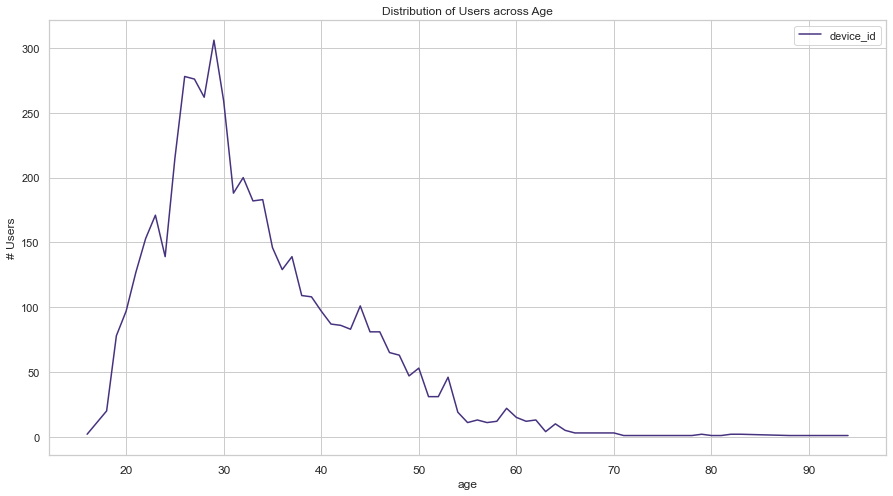

In [309]:
df_unique_did.groupby('age').device_id.count().plot()
plt.title('Distribution of Users across Age')
plt.xticks(size = 12)
plt.ylabel('# Users')
plt.legend()

- As seen in profiling, Highest users are between age 24 to 35 with highest at 29.

#### Across Age Group

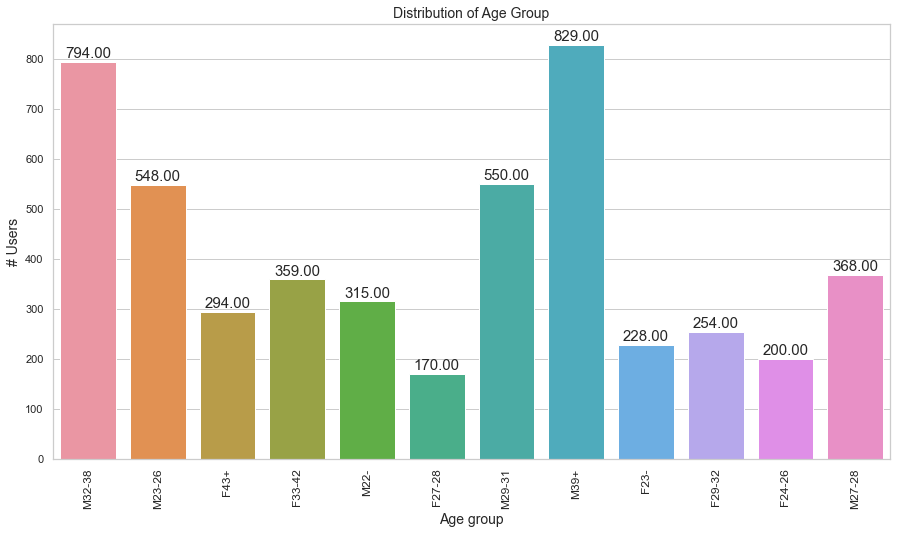

In [314]:
#df_final_did.groupby('group')['device_id'].count().plot(kind='bar');
plots = sns.countplot(x='group', data=df_unique_did)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=90, fontsize=12);
plt.xlabel('Age group',fontsize=14)
plt.ylabel('# Users', fontsize= 14);
plt.title('Distribution of Age Group', fontsize=14);

- Top 2 age group for females is 33-42 & 43+.
- Top 2 age group for Males is 32-38 & 39+.
- Most users from male & Females are above 29 age.

### Distribution of Phones Brands (Top 10)

In [317]:
# Creating list of Top 10 Brands
top10_brands_delhi = df_unique_did['phone_brand'].value_counts().nlargest(10).index.tolist()

df_top10_delhi = df_unique_did[df_unique_did['phone_brand'].isin(top10_brands_delhi)]
df_top10_delhi.shape

(4651, 12)

#### Across Gender.

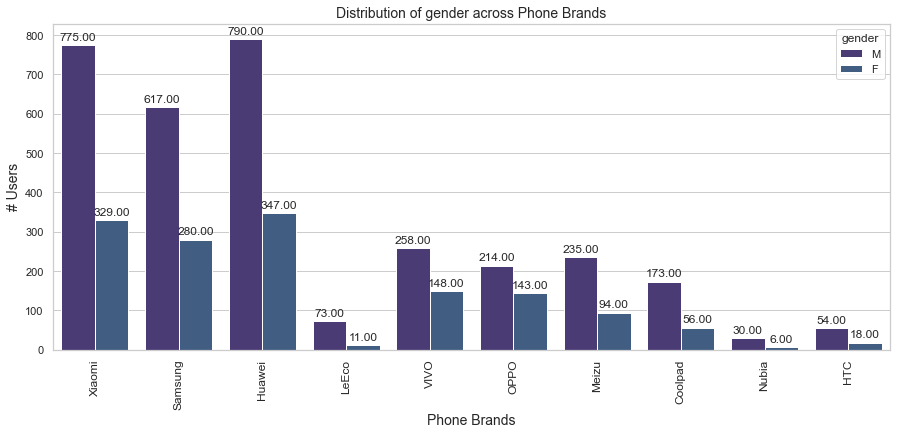

In [334]:
plt.figure(figsize=(15,6))
plots = sns.countplot(x='phone_brand', hue="gender", data=df_top10_delhi)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=90, fontsize=12);
plt.xlabel('Phone Brands',fontsize=14)
plt.ylabel('# Users', fontsize= 14);
plt.title('Distribution of gender across Phone Brands', fontsize=14);

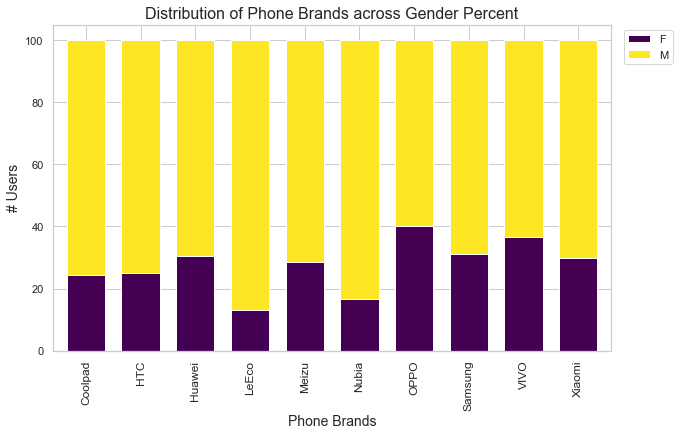

In [335]:
df_top10_delhi.groupby(['phone_brand','gender']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', stacked=True, width=0.7, cmap='viridis',figsize=(10,6));
plt.legend(bbox_to_anchor=(1.12, 1), loc='upper right');
plt.title('Distribution of Phone Brands across Gender Percent', fontsize=16);
plt.xticks(rotation=90, fontsize=12);
plt.xlabel('Phone Brands',fontsize=14)
plt.ylabel('# Users', fontsize= 14);

- Top 3 brands Huawei, Xiaomi & Samsung has the most number of users in Male & Female.
- When looked Percentage wise, OPPO & Vivo has good percent of Female users.

#### Across Age Group

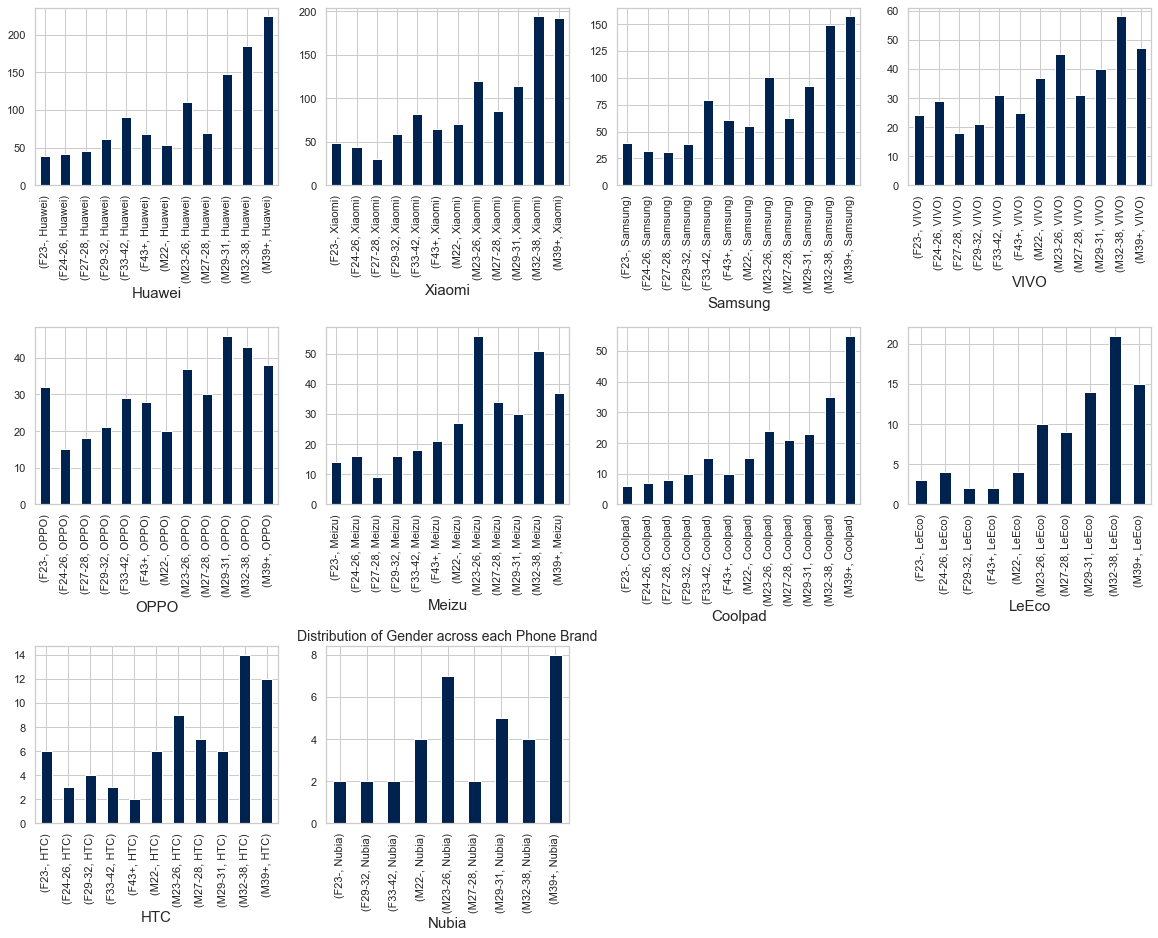

In [341]:
plt.figure(figsize=(20,15))
plt.subplots_adjust(hspace=0.8, wspace=0.2)
for i in range(1,len(top10_brands_delhi)+1):
    plt.subplot(3,4,i)
    a = df_top10_delhi[df_top10_delhi['phone_brand']== top10_brands_delhi[i-1]]
    a.groupby('group')['phone_brand'].value_counts().plot(kind='bar', cmap='cividis');
    plt.xlabel(top10_brands_delhi[i-1], fontsize=15)
plt.title('Distribution of Gender across each Phone Brand', fontsize=14);

- Top 4 brands Huawei, Xiaomi, Samsung & Vivo have most users above 31 age for Males & Females. Similar trend is seen in Coolpad, LeEco also.
- Oppo has highest male users in age group of 29-31 and above 31. But in Female users the highest users are in age group below 23.
- Meizu has highest male users in age group of 23-26. In females its highest users are above 29.
- HTC has highest male users above 31 age. But in female users the highest is below 23.
- Nubia has most users in age group of 23-26 & very less female users.


#### Across City

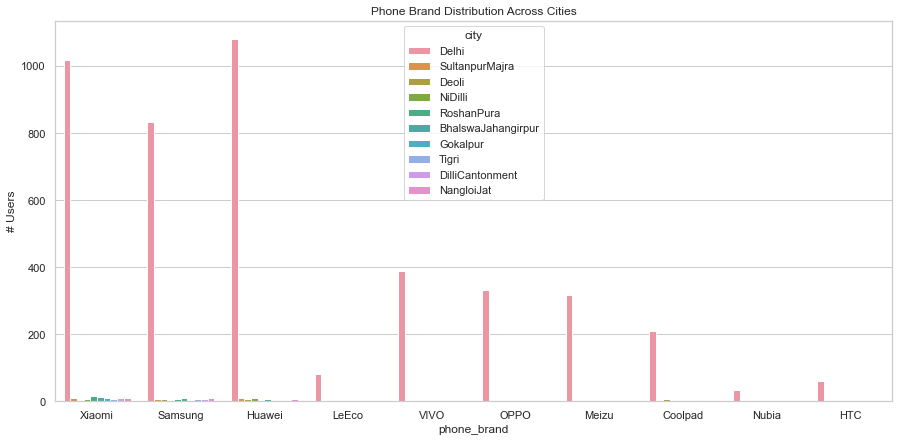

In [367]:
fig, axis1 = plt.subplots(1,1,figsize=(15,7))
sns.countplot(x='phone_brand', hue="city", data=df_top10_delhi, ax=axis1)
plt.title("Phone Brand Distribution Across Cities")
plt.ylabel('# Users');

- As Most of the users are from delhi City, it leads in all Brands.

### Distribution of Gender Across Age.

Text(0.5, 0, 'Age')

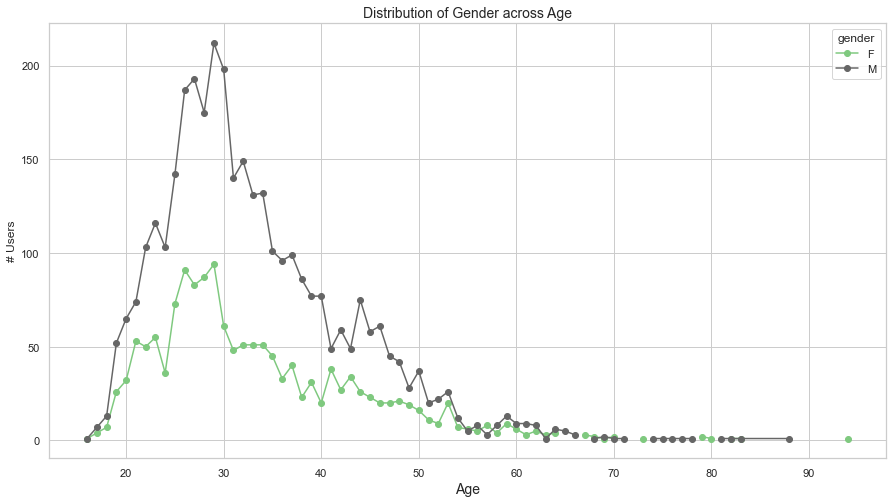

In [377]:
df_unique_did.pivot_table(columns='gender', index='age', values='event_id', aggfunc='count').plot(marker='o', cmap='Accent');
plt.title('Distribution of Gender across Age', fontsize=14);
plt.ylabel('# Users');
plt.xlabel('Age', fontsize=14)

- The age trend among Male & Female users is almost same.

### Mapping Delhi Coordinates

In [369]:
delhi_data_map = df_final_delhi.drop_duplicates(subset=['longitude','latitude'], keep='first')

In [371]:
events_map_delhi = folium.Map(location = [28.7041,77.1025], zoom_start=11)

for lat,lon,d_id, timestamp in zip(delhi_data_map['latitude'],delhi_data_map['longitude'],
                                  delhi_data_map['device_id'], delhi_data_map['timestamp']):
    if len(delhi_data_map[delhi_data_map['device_id']== d_id].index)>1:
        colour = 'red'
        rad = 6
    else:
        colour = 'blue'
        rad = 1.5
    
    folium.CircleMarker([lat, lon],popup= ('Device_id: '+ str(d_id)+'<br>'+ str(timestamp)),
                        fill=True, fill_opacity=0.3, radius=rad, color=colour).add_to(events_map_delhi)
    
events_map_delhi

In [383]:
# Getting device ids with more than 1 location.
foreign_did = []
for i in delhi_data_map.device_id:
    if len(delhi_data_map[delhi_data_map['device_id']== i].index)>1:
        foreign_did.append(i)
    
foreign_did

[2.334568628287628e+18,
 2.334568628287628e+18,
 1.0572898355663907e+18,
 1.0572898355663907e+18,
 -1.448078833416778e+18,
 -1.448078833416778e+18]

In [384]:
delhi_data_map[delhi_data_map['device_id'].isin(foreign_did)]

event_id                   device_id           timestamp  longitude  \
63249     848926  2334568628287627776.000000 2016-05-05 14:46:29  77.295286   
64035     441997  2334568628287627776.000000 2016-05-05 10:58:04  55.270800   
250675   2208653  1057289835566390656.000000 2016-05-04 11:30:22  77.224248   
251224    251785  1057289835566390656.000000 2016-05-07 14:23:56  69.207500   
458530   2798530 -1448078833416777984.000000 2016-05-05 08:11:58  77.248501   
458579    452839 -1448078833416777984.000000 2016-05-01 16:44:00  12.567400   

        latitude   city  state phone_brand       device_model gender  age  \
63249  28.749275  Delhi  Delhi        ASUS          ZenFone 2      M   39   
64035  25.204800  Delhi  Delhi        ASUS          ZenFone 2      M   39   
250675 28.723255  Delhi  Delhi       LeEco  Superphone 1 Pro       M   31   
251224 34.555300  Delhi  Delhi       LeEco  Superphone 1 Pro       M   31   
458530 28.727344  Delhi  Delhi      Huawei          Ascend G6      M   34   
458579 41.871900  Delhi  Delhi      Huawei          Ascend G6      M   34   

         group       days  hour  
63249     M39+   Thursday    14  
64035     M39+   Thursday    10  
250675  M29-31  Wednesday    11  
251224  M29-31   Saturday    14  
458530  M32-38   Thursday     8  
458579  M32-38     Sunday    16

- The map shows most of the users have location in central delhi.
- 3 foreign coordinates have been marked in Dubai, Italy & Afghanistan.
- These three people seems to have travelled to foreign locations as the date/ time for both events are different.

### Time Date visualization

#### Distibution of events recorded datewise

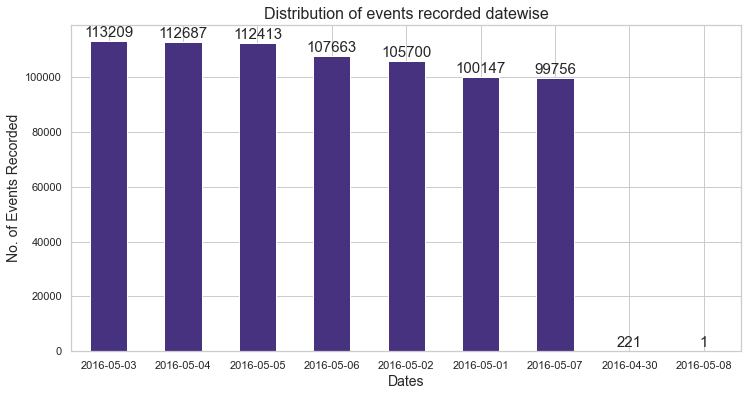

In [382]:
plots = df_final_delhi.timestamp.dt.date.value_counts().plot(kind='bar', figsize=(12,6));
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation='horizontal');
plt.xlabel("Dates", size=14);
plt.ylabel("No. of Events Recorded", size=14);
plt.title("Distribution of events recorded datewise", fontsize='16');

- Events count on 30th April(Saturday) and 8th May(Sunday) is very low compared to other seven days.
- Hence we look into the distibution day wise.

#### Daywise Distribution of Events

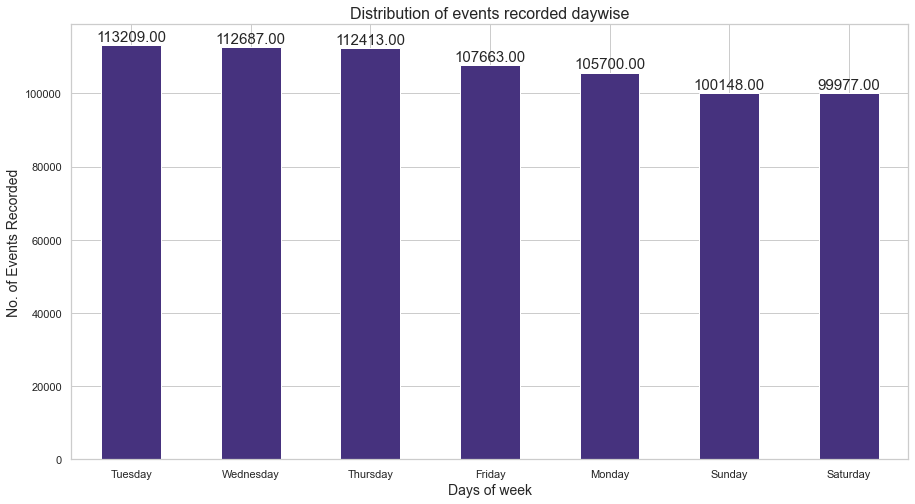

In [385]:
plots = df_final_delhi.days.value_counts().plot(kind='bar')
# Iterrating over the bars one-by-one
for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation='horizontal')
plt.xlabel("Days of week", size=14)
plt.ylabel("No. of Events Recorded", size=14)
plt.title("Distribution of events recorded daywise", fontsize='16')
plt.show()

- **The highest events are recored on weekdays as they are working days.**

####  Hourly distribution of events recorded

<Figure size 864x576 with 0 Axes>

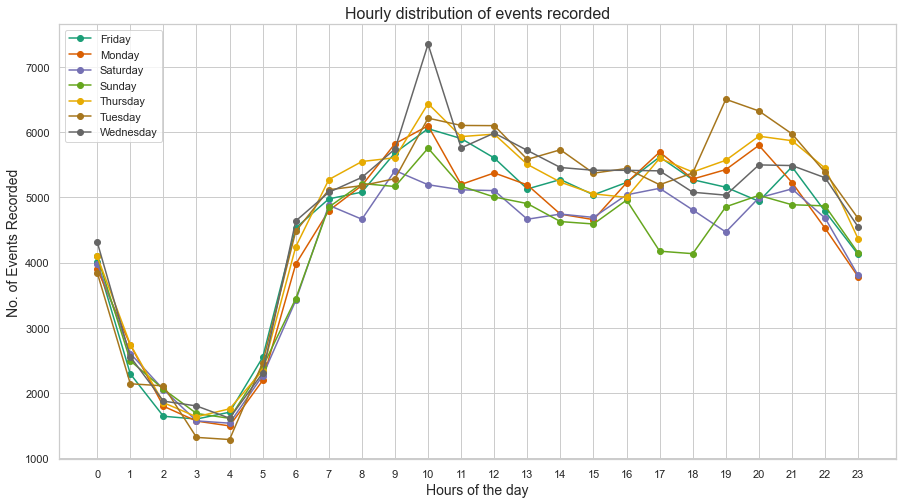

In [391]:
plt.figure(figsize=(12,8));
label = [*range(0,24)]
a = df_final_delhi.pivot_table(columns='days', index='hour',values='event_id', aggfunc='count')
a.plot(marker='o', cmap='Dark2');
plt.xticks(ticks = label ,labels= label);
plt.legend();
plt.xlabel("Hours of the day", size=14);
plt.ylabel("No. of Events Recorded", size=14);
plt.title("Hourly distribution of events recorded", fontsize='16');

<Figure size 864x576 with 0 Axes>

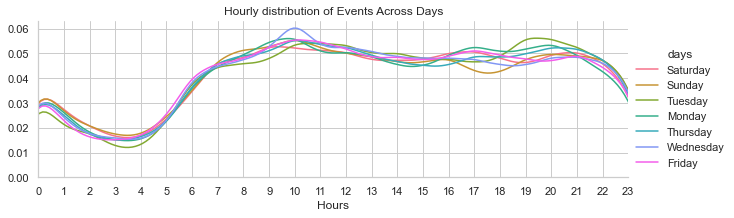

In [394]:
plt.figure(figsize=(12,8))
as_fig = sns.FacetGrid(df_final_delhi,hue='days',aspect=3);
as_fig.map(sns.kdeplot,'hour');
oldest = df_final_delhi['hour'].max()
as_fig.set(xlim=(0,oldest));
as_fig.add_legend();
plt.xticks(np.arange(0,24,1));
plt.title('Hourly distribution of Events Across Days');
plt.xlabel("Hours");

- The trend is smilar for all the days.
- Frequency of events start rising from 6.00 hrs in the morning.
- Highest no. of events are recorded during the 10.00hrs to 12.00hrs(peak working hours).
- A slight increase is seen during the evening 18.00 hrs to 21.00hrs.

#### Hourly distribution of events by Gender & Age group wise.

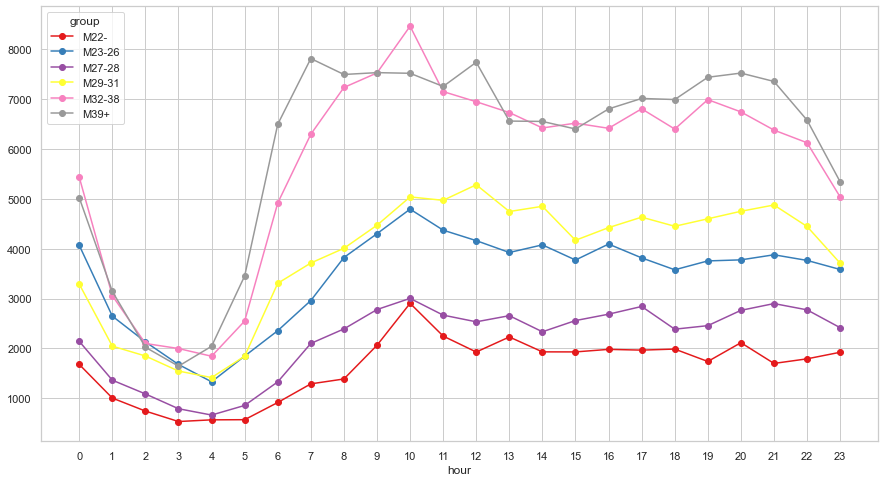

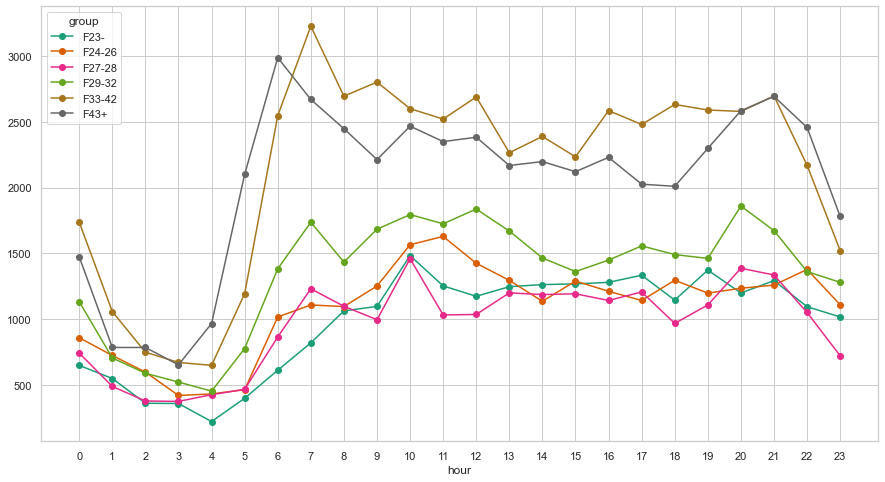

In [403]:
temp_a= df_final_delhi.query("gender == 'M'")
temp_b= df_final_delhi.query("gender == 'F'")

temp_a.groupby('hour')['group'].value_counts().unstack().plot(marker='o', cmap='Set1');
plt.xticks(ticks = label ,labels= label);

temp_b.groupby('hour')['group'].value_counts().unstack().plot(marker='o', cmap='Dark2');
plt.xticks(ticks = label ,labels= label);

-The trend of call events recorded are almost similar in all age group across both Males & Females.